# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

# Load the hyperspectral data and ground truth data

In [2]:
hyperspectral_data_path = 'Dataset/indianpinearray.npy'
ground_truth_path = 'Dataset/IPgt.npy'

hyperspectral_data = np.load(hyperspectral_data_path)
ground_truth = np.load(ground_truth_path)

# Display the shapes of the datasets

In [3]:
hyperspectral_data_shape = hyperspectral_data.shape
ground_truth_shape = ground_truth.shape

hyperspectral_data_shape, ground_truth_shape

((145, 145, 200), (145, 145))

# Visualizations

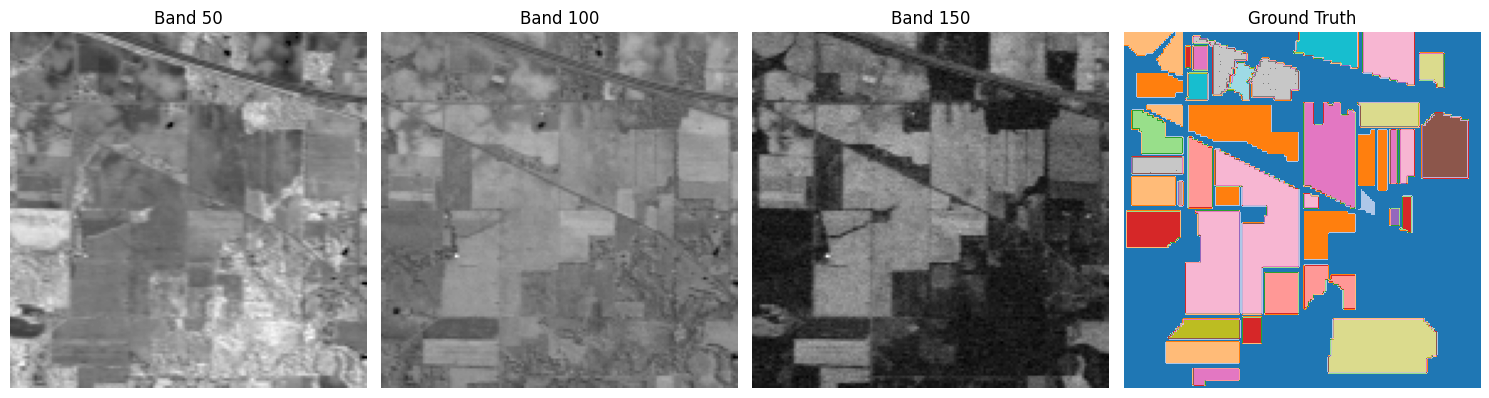

In [4]:
# Function to normalize the images for display
def normalize_image(img):
    return (img - img.min()) / (img.max() - img.min())

# Selecting three bands for visualization
band1 = normalize_image(hyperspectral_data[:, :, 50])  # Band from the lower end
band2 = normalize_image(hyperspectral_data[:, :, 100]) # Band from the middle
band3 = normalize_image(hyperspectral_data[:, :, 150]) # Band from the higher end

# Plotting the selected bands
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(band1, cmap='gray')
plt.title('Band 50')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(band2, cmap='gray')
plt.title('Band 100')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(band3, cmap='gray')
plt.title('Band 150')
plt.axis('off')

# Plotting the ground truth
plt.subplot(1, 4, 4)
plt.imshow(ground_truth, cmap='tab20')
plt.title('Ground Truth')
plt.axis('off')

plt.tight_layout()
plt.show()

# The visualizations above provide an overview of the Indian Pines hyperspectral dataset:

### Band 50, 100, and 150 Visualizations:
These images are from different spectral bands (lower, middle, and higher end of the spectrum). The variations in these images reflect different characteristics of the landscape as captured in each spectral band. These differences are often related to the physical and chemical properties of the materials in the scene.

### Ground Truth Visualization:
The ground truth image shows the segmentation of the landscape into different classes. Each color represents a different class or type of land cover or vegetation.

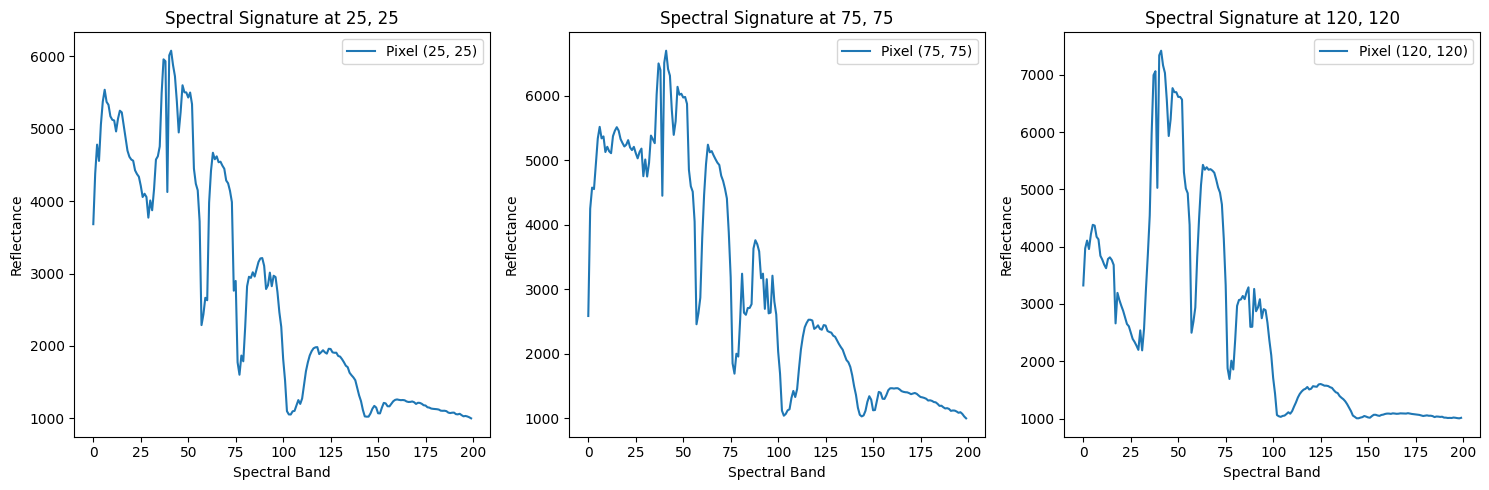

In [5]:
# Function to plot spectral signature for a given pixel
def plot_spectral_signature(x, y, title):
    spectral_signature = hyperspectral_data[x, y, :]
    plt.plot(spectral_signature, label=f"Pixel ({x}, {y})")
    plt.title(title)
    plt.xlabel('Spectral Band')
    plt.ylabel('Reflectance')
    plt.legend()

# Selecting a few representative pixels from different classes
# Note: The selection is arbitrary for illustration purposes
pixels_to_plot = [(25, 25), (75, 75), (120, 120)]

plt.figure(figsize=(15, 5))
for i, (x, y) in enumerate(pixels_to_plot, start=1):
    plt.subplot(1, len(pixels_to_plot), i)
    plot_spectral_signature(x, y, f"Spectral Signature at {x}, {y}")

plt.tight_layout()
plt.show()


The plots above show the spectral signatures for three selected pixels at different locations in the Indian Pines hyperspectral dataset. Each plot illustrates how the reflectance varies across the 200 spectral bands for a specific pixel. These variations are key in distinguishing different materials or land cover types:

First Pixel (25, 25): The spectral signature shows unique peaks and troughs, which might correspond to a specific type of vegetation or soil.

Second Pixel (75, 75): This signature is different from the first, indicating a different material or land cover type.

Third Pixel (120, 120): Again, a distinct pattern is observed, suggesting another unique material or land cover class.

# Principal Component Analysis (PCA)

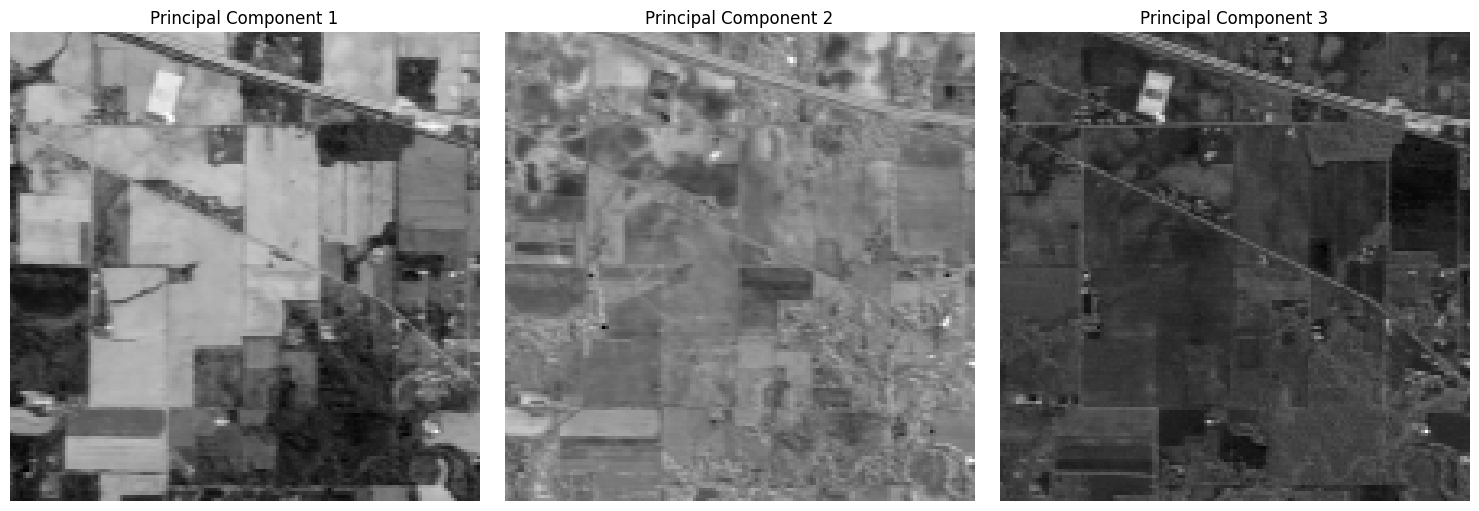

In [6]:
# Reshaping the hyperspectral data for PCA
# The shape should be (number of pixels, number of bands)
n_bands = hyperspectral_data.shape[2]
reshaped_data = hyperspectral_data.reshape(-1, n_bands)

# Applying PCA
pca = PCA(n_components=3)  # Taking first 3 components for visualization
pca_result = pca.fit_transform(reshaped_data)

# Reshaping the PCA result back to image format for visualization
pca_images = pca_result.reshape(hyperspectral_data.shape[0], hyperspectral_data.shape[1], 3)

# Normalizing the PCA images for display
pca_images_normalized = np.zeros_like(pca_images)
for i in range(3):
    pca_images_normalized[:, :, i] = normalize_image(pca_images[:, :, i])

# Plotting the first three principal components
plt.figure(figsize=(15, 5))

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(pca_images_normalized[:, :, i], cmap='gray')
    plt.title(f'Principal Component {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


The visualizations above display the first three principal components obtained from the PCA of the Indian Pines hyperspectral dataset:

Principal Component 1 (PC1): This component captures the most variance in the dataset. The corresponding image shows the features with the highest variance, which could be key differentiators in the landscape.

Principal Component 2 (PC2): The second component captures the second most variance. It might highlight different features compared to PC1, offering another perspective on the dataset's variance.

Principal Component 3 (PC3): This component adds further detail, capturing additional variance in the data not covered by the first two components.

# Advanced compression methods

For advanced compression methods beyond what's discussed in your paper, consider exploring the following techniques:

1.	Wavelet-Based Compression: Wavelets are effective for multispectral and hyperspectral image compression. They allow for both lossy and lossless compression, with good performance in terms of both compression rate and image quality.

2.	Deep Learning-Based Compression: Deep learning models, such as Generative Adversarial Networks (GANs), can be trained to compress and reconstruct hyperspectral images. These models can potentially outperform traditional methods like PCA and autoencoders in preserving the quality of compressed images.

3.	Sparse Representation: This method involves representing hyperspectral images in a sparse format, reducing redundancy and allowing for efficient compression. Techniques like dictionary learning can be employed for this purpose.

4.	Vector Quantization: This method compresses hyperspectral images by reducing the number of distinct symbols used in the image, effectively clustering similar data points.

5.	Tucker Decomposition: A form of tensor decomposition, Tucker Decomposition can be used to compress hyperspectral data by decomposing it into a core tensor and a set of orthogonal matrices.

6.	Non-Linear Dimensionality Reduction: Techniques like t-Distributed Stochastic Neighbor Embedding (t-SNE) or Uniform Manifold Approximation and Projection (UMAP) can be used to reduce the dimensions of hyperspectral data while preserving its intrinsic structure.


# Wavelet-Based Compression

Implementing wavelet-based compression for the Indian Pines hyperspectral dataset is a sophisticated approach. Wavelet compression is useful for reducing data size while preserving significant features. This method is particularly beneficial for hyperspectral data due to its ability to handle multidimensional data efficiently.

Here's the approach for wavelet-based compression:

Wavelet Transformation: Apply a wavelet transform to the hyperspectral data. This transform decomposes the data into a set of wavelet coefficients, capturing both spatial and frequency information.

Compression: After transforming, we compress the data by thresholding or quantizing the wavelet coefficients. This step reduces the amount of data by keeping only the most significant coefficients.

Reconstruction: Finally, reconstruct the image from the compressed wavelet coefficients to visualize the effect of compression.

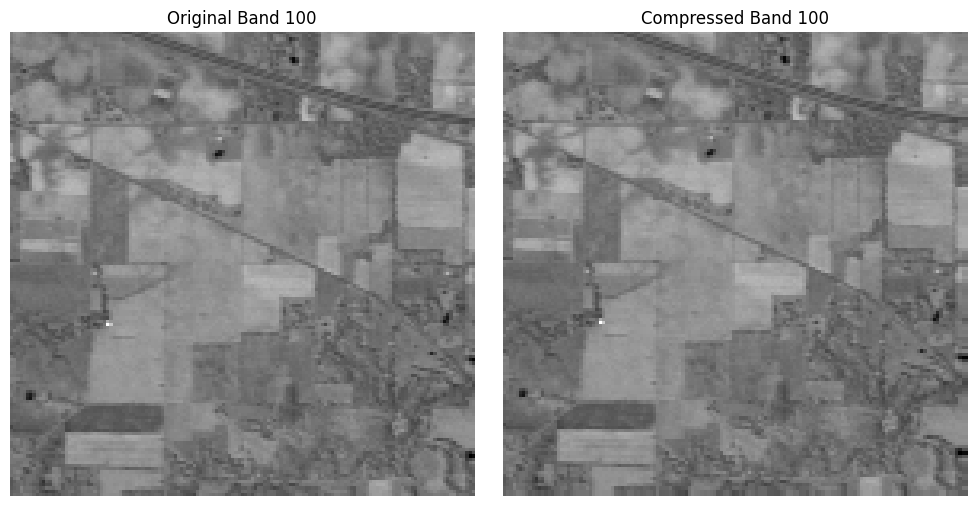

In [11]:
import pywt

# Function to perform wavelet transform and compression
def wavelet_compress(image, mode='haar', level=1, threshold=0.2):
    # Apply 2D Discrete Wavelet Transform
    coeffs = pywt.dwt2(image, mode)
    cA, (cH, cV, cD) = coeffs

    # Applying thresholding for compression
    cA = np.where(np.abs(cA) > threshold, cA, 0)
    cH = np.where(np.abs(cH) > threshold, cH, 0)
    cV = np.where(np.abs(cV) > threshold, cV, 0)
    cD = np.where(np.abs(cD) > threshold, cD, 0)

    # Reconstructing the image from compressed coefficients
    compressed_coeffs = cA, (cH, cV, cD)
    compressed_image = pywt.idwt2(compressed_coeffs, mode)

    return compressed_image

# Selecting a single band for demonstration (band 100)
band_to_compress = hyperspectral_data[:, :, 100]

# Performing wavelet-based compression
compressed_band = wavelet_compress(band_to_compress)

# Normalizing images for display
original_normalized = normalize_image(band_to_compress)
compressed_normalized = normalize_image(compressed_band)

# Plotting the original and compressed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_normalized, cmap='gray')
plt.title('Original Band 100')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(compressed_normalized, cmap='gray')
plt.title('Compressed Band 100')
plt.axis('off')

plt.tight_layout()
plt.show()


The images above illustrate the effect of wavelet-based compression on a single spectral band (Band 100) of the Indian Pines hyperspectral dataset:

Original Band 100: This is the original spectral band without any compression. It represents the full data as captured in this particular band.

Compressed Band 100: This image shows the result after applying wavelet-based compression. The compression process involved thresholding the wavelet coefficients to reduce data size while attempting to preserve significant features.

From the comparison, you can observe how the compression affects the image. The compressed image may show some loss of detail, but the overall structure and major features are generally preserved. This balance between data reduction and feature preservation is key in wavelet compression, especially for applications where data size is a concern but retaining critical information is essential.

# On the Impact of Lossy Compression on the Classification Accuracy of Hyperspectral Images

# Implement Wavelet-Based Compression

In [12]:
import pywt
import numpy as np

def wavelet_compress_hyperspectral_corrected(image, mode='haar', level=1, threshold=0.2):
    # Apply 2D Discrete Wavelet Transform
    coeffs = pywt.dwt2(image, mode)
    cA, (cH, cV, cD) = coeffs

    # Applying thresholding for compression
    cA = np.where(np.abs(cA) > threshold, cA, 0)
    cH = np.where(np.abs(cH) > threshold, cH, 0)
    cV = np.where(np.abs(cV) > threshold, cV, 0)
    cD = np.where(np.abs(cD) > threshold, cD, 0)

    # Reconstructing the image from compressed coefficients
    compressed_coeffs = cA, (cH, cV, cD)
    compressed_image = pywt.idwt2(compressed_coeffs, mode)

    return compressed_image

In [13]:
def manual_resize(image, new_shape):
    """
    Manually resizes an image using basic interpolation.
    """
    # Calculate scale factors
    scale_x = new_shape[1] / image.shape[1]
    scale_y = new_shape[0] / image.shape[0]

    # Initialize new image
    resized_image = np.zeros(new_shape)

    for i in range(new_shape[0]):
        for j in range(new_shape[1]):
            # Find the corresponding pixel in the original image
            orig_x = int(j / scale_x)
            orig_y = int(i / scale_y)
            resized_image[i, j] = image[orig_y, orig_x]

    return resized_image

def wavelet_compress_corrected(image, mode='haar', level=1, threshold=0.2):
    # Apply 2D Discrete Wavelet Transform
    coeffs = pywt.dwt2(image, mode)
    cA, (cH, cV, cD) = coeffs

    # Applying thresholding for compression
    cA = np.where(np.abs(cA) > threshold, cA, 0)
    cH = np.where(np.abs(cH) > threshold, cH, 0)
    cV = np.where(np.abs(cV) > threshold, cV, 0)
    cD = np.where(np.abs(cD) > threshold, cD, 0)

    # Reconstructing the image from compressed coefficients
    compressed_coeffs = cA, (cH, cV, cD)
    compressed_image = pywt.idwt2(compressed_coeffs, mode)

    # Resizing the compressed image to match the original dimensions
    compressed_image_resized = manual_resize(compressed_image, image.shape)

    return compressed_image_resized

# Applying wavelet-based compression with corrected dimensions
compressed_hyperspectral_data_corrected = wavelet_compress_hyperspectral_corrected(hyperspectral_data)

# Checking the shape of the corrected compressed data
compressed_data_corrected_shape = compressed_hyperspectral_data_corrected.shape
compressed_data_corrected_shape

(145, 146, 200)

In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

def create_autoencoder(input_shape):
    # Encoder
    input_img = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(input_shape[2], (3, 3), activation='sigmoid', padding='same')(x)

    # Autoencoder model
    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    return autoencoder

# Assuming your data after wavelet compression is stored in 'compressed_data'
# and has the shape (num_samples, height, width, num_channels)
autoencoder = create_autoencoder(compressed_data.shape[1:])


NameError: name 'compressed_data' is not defined

In [15]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

def create_autoencoder(input_shape):
    # Encoder
    input_img = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(input_shape[2], (3, 3), activation='sigmoid', padding='same')(x)

    # Autoencoder model
    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    return autoencoder

# Assuming your compressed hyperspectral data is stored in 'compressed_hyperspectral_data'
# and has the shape (num_samples, height, width, num_channels)
autoencoder = create_autoencoder(compressed_hyperspectral_data.shape[1:])

# Now, you can train the autoencoder model using your compressed hyperspectral data
# For example:
# autoencoder.fit(compressed_hyperspectral_data, compressed_hyperspectral_data, epochs=50, batch_size=32)


NameError: name 'compressed_hyperspectral_data' is not defined